In [1]:
import os

download_name = "surnames.csv.bz2"
if not os.path.exists(download_name):
    import requests
    response = requests.get(f"https://raw.githubusercontent.com/bzitko/nlp_repo/main/lectures/p03/{download_name}")
    with open(download_name, "wb") as fp:
        fp.write(response.content)
    response.close()

name = "surnames.csv"
if not os.path.exists(name):
    import bz2
    with open(download_name, 'rb') as bzf, open(name, 'wb') as fp:
        fp.write(bz2.decompress(bzf.read()))        

In [2]:
import collections
import numpy as np
import pandas as pd
import re

from argparse import Namespace

In [3]:
args = Namespace(
    raw_dataset_csv="surnames.csv",
    train_proportion=0.7,
    val_proportion=0.15,
    test_proportion=0.15,
    output_munged_csv="surnames_with_splits.csv",
    seed=1337
)

In [4]:
# Read raw data
surnames = pd.read_csv(args.raw_dataset_csv, header=0)

In [5]:
surnames.head()

,surname,nationality
0,Woodford,English
1,Coté,French
2,Kore,English
3,Koury,Arabic
4,Lebzak,Russian


<AxesSubplot:xlabel='# surnames'>

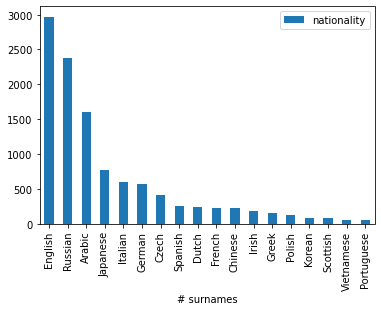

In [6]:
# Unique classes
pd.DataFrame(surnames.nationality.value_counts()).plot.bar(xlabel="# surnames")

In [7]:
# Splitting train by nationality
# Create dict
by_nationality = collections.defaultdict(list)
for _, row in surnames.iterrows():
    by_nationality[row.nationality].append(row.to_dict())

In [8]:
# Create split data
final_list = []
np.random.seed(args.seed)
for _, item_list in sorted(by_nationality.items()):
    np.random.shuffle(item_list)
    n = len(item_list)
    n_train = int(args.train_proportion * n)
    n_val = int(args.val_proportion * n)
    n_test = int(args.test_proportion * n)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    for item in item_list[n_train : n_train + n_val]:
        item['split'] = 'val'
    for item in item_list[n_train + n_val:]:
        item['split'] = 'test'  
    
    # Add to final list
    final_list.extend(item_list)

In [9]:
# Write split data to file
final_surnames = pd.DataFrame(final_list)

In [10]:
final_surnames.split.value_counts()

train    7680
test     1660
val      1640
Name: split, dtype: int64

In [11]:
final_surnames.head()

,surname,nationality,split
0,Totah,Arabic,train
1,Abboud,Arabic,train
2,Fakhoury,Arabic,train
3,Srour,Arabic,train
4,Sayegh,Arabic,train


In [12]:
# Write munged data to CSV
final_surnames.to_csv(args.output_munged_csv, index=False)

<AxesSubplot:ylabel='# surnames'>

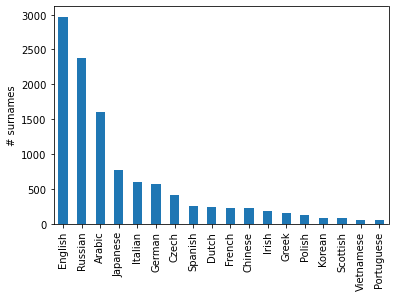

In [13]:
final_surnames.nationality.value_counts().plot.bar(ylabel="# surnames")